# What is Time Series?
 time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. For example, stock prices over a fixed period of time, hotel bookings, ecommerce sales, waether cycle reports etc.

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#The adfuller function from statsmodels.tsa.stattools can be used to perform the ADF test to check for stationarity in a time series.
from statsmodels.tsa.stattools import adfuller
#The seasonal_decompose function from statsmodels.tsa.seasonal can be used to decompose a time series into its trend, seasonal, and residual components.
from statsmodels.tsa.seasonal import seasonal_decompose
#The ARIMA model from statsmodels.tsa.arima.model can be used for time series forecasting.
from statsmodels.tsa.arima.model import ARIMA

# Load the univariate time series data
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'])
passengers = data['#Passengers']


In [2]:
# Data Preprocessing
# Following Function show the dimension of data, Columns names,
def check_data(df):
    print(80 * "*")
    print('DIMENSION: ({}, {})'.format(df.shape[0], df.shape[1]))
    print(80 * "*")
    print("COLUMNS:\n")
    print(df.columns.values)
    print(80 * "*")
    print("DATA INFO:\n")
    print(df.dtypes)
    print(80 * "*")
    print("MISSING VALUES:\n")
    print(df.isnull().sum())
    print(80 * "*")
    print("NUMBER OF UNIQUE VALUES:\n")
    print(df.nunique())


In [3]:
check_data(data)

********************************************************************************
DIMENSION: (144, 2)
********************************************************************************
COLUMNS:

['Month' '#Passengers']
********************************************************************************
DATA INFO:

Month          datetime64[ns]
#Passengers             int64
dtype: object
********************************************************************************
MISSING VALUES:

Month          0
#Passengers    0
dtype: int64
********************************************************************************
NUMBER OF UNIQUE VALUES:

Month          144
#Passengers    118
dtype: int64


# Stationarity Verification

In [4]:
# Stationarity Verification (ADF Test)
result = adfuller(passengers)
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}%:', value)


ADF Statistic: 0.8153688792060423
p-value: 0.9918802434376409
Critical Values:
1%%: -3.4816817173418295
5%%: -2.8840418343195267
10%%: -2.578770059171598


 the p-value (0.9918802434376409) is much greater than the typical significance level of 0.05. Therefore, you fail to reject the null hypothesis, and it suggests that the data is non-stationary.

Remember that stationarity is an important assumption for many time series models. If your data is non-stationary, you might need to apply transformations or differencing techniques to make it stationary before proceeding with modeling or forecasting.

# Seasonality Verification


Seasonality verification refers to the process of analyzing data or patterns to determine if there is a recurring seasonal pattern or trend. It involves examining the data over a specific time period and identifying any regular fluctuations or cycles that occur at the same time each year.

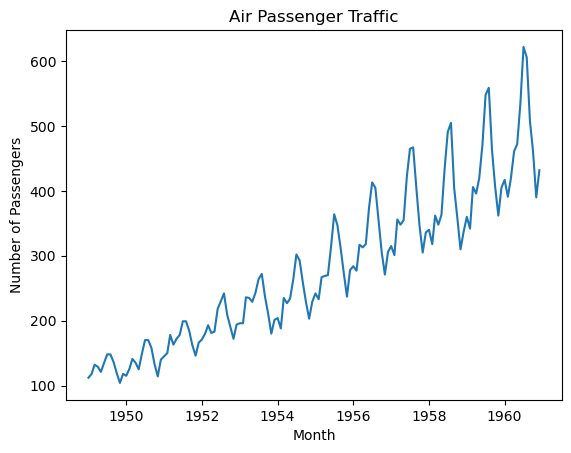

In [5]:

# Seasonality Verification
# Plot the time series
plt.plot(data['Month'], passengers)
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Air Passenger Traffic')
plt.show()

# Seasonal Decomposition

Seasonal decomposition is a technique used to separate a time series into its individual components: trend, seasonality, and residual (or error) components. It provides valuable insights into the underlying patterns and variations in the data. Here are some reasons why we use seasonal decomposition:

Understanding Seasonality: Seasonal decomposition helps us identify and understand the seasonal patterns or cycles present in the data. By separating the data into trend and seasonal components, we can gain insights into the regular patterns that repeat over fixed intervals (e.g., daily, monthly, yearly).

Trend Analysis: Decomposing the time series allows us to examine the long-term trend or direction of the data. It helps identify whether the data is increasing, decreasing, or following any specific pattern over time.

Anomaly Detection: By analyzing the residuals (or errors) obtained from the decomposition, we can detect any unusual or anomalous behavior in the data. Large residuals might indicate outliers or unexpected fluctuations that deviate from the expected pattern.

Forecasting: Seasonal decomposition can assist in forecasting future values by providing separate components that can be modeled individually. The trend and seasonal components can be used to build forecasting models (such as ARIMA or exponential smoothing) and make predictions.

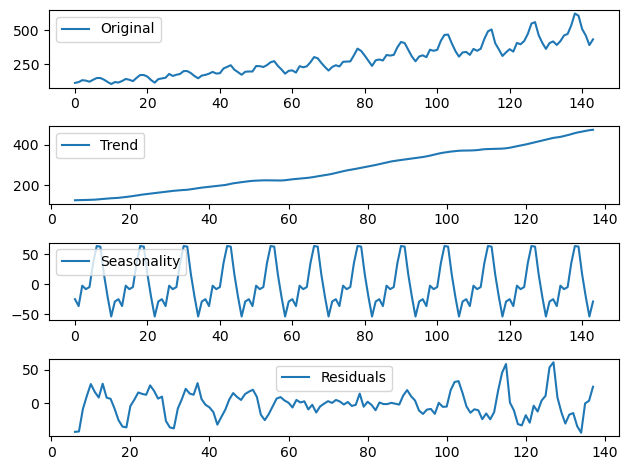

In [6]:
# Seasonal Decomposition
decomposition = seasonal_decompose(passengers, model='additive', period=12)  # Assuming annual seasonality
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition components
plt.subplot(411)
plt.plot(passengers, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()



# Seasonality Removal and make data stationary 

In [7]:
# Seasonality Removal and make data stationary 
# ...
# First-order differencing
data['stationary_data'] = data['#Passengers'].diff()

# Seasonal differencing
seasonal_period = 12  # Specify the appropriate seasonal period
data['stationary_data'] = data['#Passengers'].diff(periods=seasonal_period)


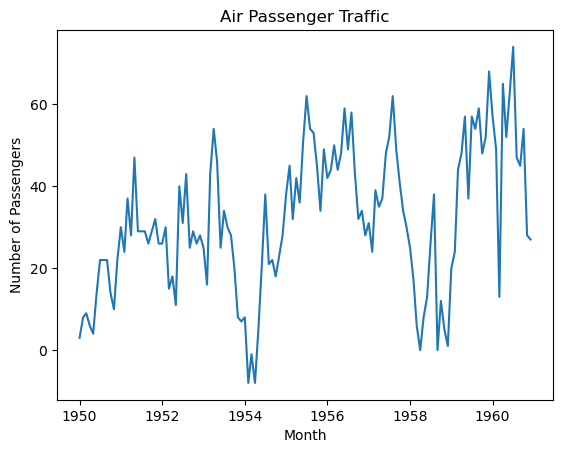

In [8]:
# Seasonality Verification
# Plot the time series
data_stationary=data['stationary_data']
plt.plot(data['Month'], data_stationary)
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Air Passenger Traffic')
plt.show()


# ARIMA MODEL

# Without removing seasonality

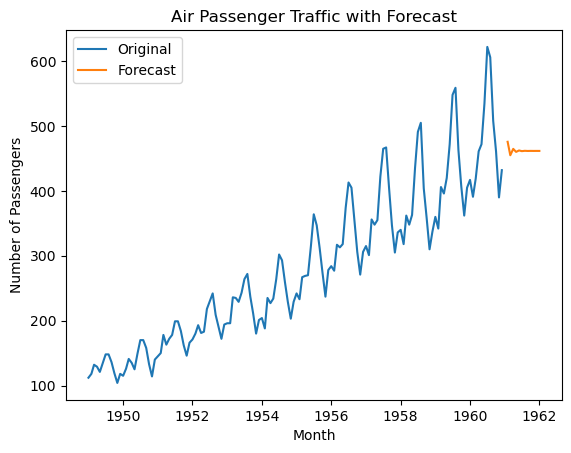

In [9]:
# ARIMA Model Forecast
model = ARIMA(passengers, order=(1, 1, 1))  # Example ARIMA(1, 1, 1) model, adjust order as needed
model_fit = model.fit()
num_periods = 12  # Define the number of periods for the forecast
forecast_index = pd.date_range(start=data['Month'].iloc[-1], periods=num_periods + 1, freq='M')[1:]  # Adjust forecast index
forecast = model_fit.predict(start=len(passengers), end=len(passengers) + num_periods - 1)

# Visualize the time series and forecast
plt.plot(data['Month'], passengers, label='Original')
plt.plot(forecast_index, forecast, label='Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Air Passenger Traffic with Forecast')
plt.legend()
plt.show()


# After Removing Seasonality

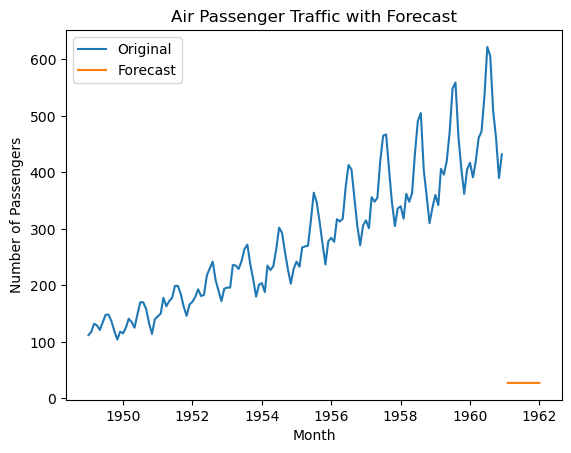

In [10]:
# ARIMA Model Forecast
model = ARIMA(data_stationary, order=(1, 1, 1))  # Example ARIMA(1, 1, 1) model, adjust order as needed
model_fit = model.fit()
num_periods = 12  # Define the number of periods for the forecast
forecast_index = pd.date_range(start=data['Month'].iloc[-1], periods=num_periods + 1, freq='M')[1:]  # Adjust forecast index
forecast = model_fit.predict(start=len(passengers), end=len(passengers) + num_periods - 1)

# Visualize the time series and forecast
plt.plot(data['Month'], passengers, label='Original')
plt.plot(forecast_index, forecast, label='Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Air Passenger Traffic with Forecast')
plt.legend()
plt.show()


# Anaomly Detetction:

# Without Removing Seasonality

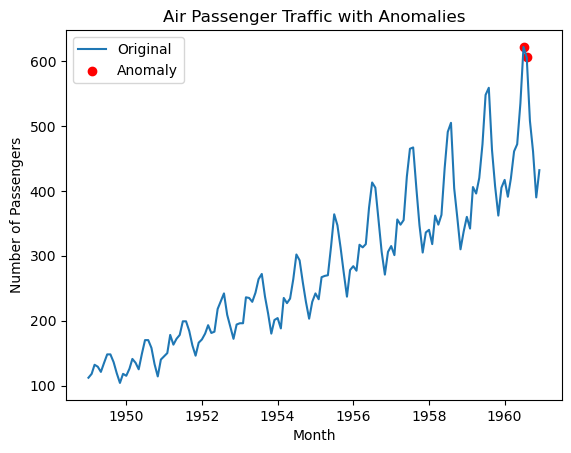

In [11]:
from sklearn.ensemble import IsolationForest

# Perform anomaly detection using Isolation Forest
outlier_detector = IsolationForest(contamination=0.01)  # Adjust the contamination parameter as needed
outlier_detector.fit(passengers.values.reshape(-1, 1))
anomalies = outlier_detector.predict(passengers.values.reshape(-1, 1))
data['anomaly'] = anomalies

# Visualize the time series with anomalies
plt.plot(data['Month'], passengers, label='Original')
plt.scatter(data[data['anomaly'] == -1]['Month'], passengers[data['anomaly'] == -1], color='r', label='Anomaly')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Air Passenger Traffic with Anomalies')
plt.legend()
plt.show()

# Remove anomalies from the data
clean_data = data[data['anomaly'] != -1]


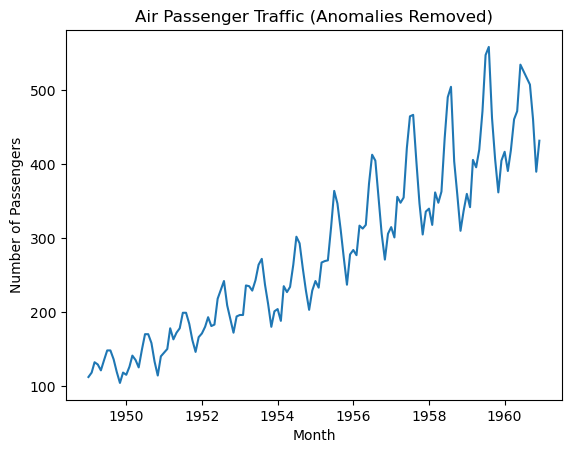

In [12]:
# Visualize the time series without anomalies
plt.plot(clean_data['Month'], clean_data['#Passengers'])
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Air Passenger Traffic (Anomalies Removed)')
plt.show()


# After Removig Seasonality

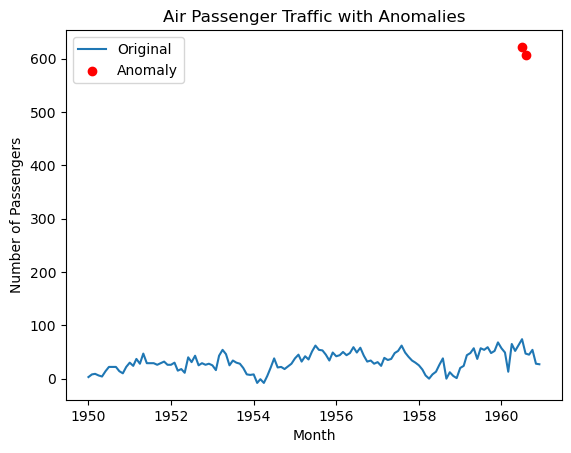

In [13]:
# Perform anomaly detection using Isolation Forest
outlier_detector = IsolationForest(contamination=0.01)  # Adjust the contamination parameter as needed
outlier_detector.fit(passengers.values.reshape(-1, 1))
anomalies = outlier_detector.predict(passengers.values.reshape(-1, 1))
data['anomaly'] = anomalies

# Visualize the time series with anomalies
plt.plot(data['Month'], data_stationary, label='Original')
plt.scatter(data[data['anomaly'] == -1]['Month'], passengers[data['anomaly'] == -1], color='r', label='Anomaly')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Air Passenger Traffic with Anomalies')
plt.legend()
plt.show()

# Remove anomalies from the data
clean_data = data[data['anomaly'] != -1]


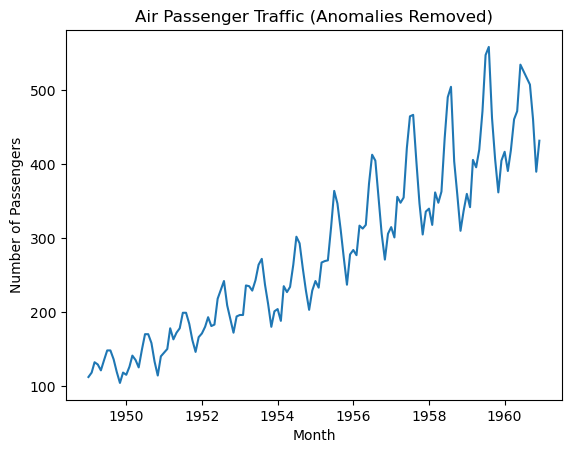

In [14]:
# Visualize the time series without anomalies
plt.plot(clean_data['Month'], clean_data['#Passengers'])
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Air Passenger Traffic (Anomalies Removed)')
plt.show()


In [16]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# Perform Ljung-Box test
lb_test = acorr_ljungbox(residual, lags=[10], return_df=True)
print(lb_test)

# Forecast future values
forecast, conf_int = model.predict(n_periods=12, return_conf_int=True)

# Create a dataframe to store the forecasted values and confidence intervals
forecast_df = pd.DataFrame({'forecast': forecast, 'lower_bound': conf_int[:, 0], 'upper_bound': conf_int[:, 1]})

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['passengers'], label='Original Data')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='orange')
plt.fill_between(forecast_df.index, forecast_df['lower_bound'], forecast_df['upper_bound'], color='orange', alpha=0.2)
plt.title('Air Passengers Forecast')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


    lb_stat  lb_pvalue
10      NaN        NaN


TypeError: Model.predict() missing 1 required positional argument: 'params'